# Problem Statement
The main purpose of the dataset is to estimate motor variables like the motor temperatures using other measurables variables from the same motor like currents, voltages, motor speed, and coolant and ambient temperatures. Keeping the temperature inside the motor parts under control is important as the permanent magnet could demagnetize or the rotor windings could melt and both lead to motor failure.

# Predict Motor Speed based on other attributes available
## Features:
1. ambient
2. coolant
3. u_d
4. u_q
5. motor_speed
6. torque
7. i_d
8. i_q
9. pm
10. stator_yoke
11. stator_tooth. 
12. stator_winding
13. profile_id

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Reading the dataset (csv file)
data=pd.read_csv('temperature_data.csv')
df=data.copy()
df.head()

ambient   coolant       u_d       u_q  motor_speed    torque       i_d  \
0 -0.752143 -1.118446  0.327935 -1.297858    -1.222428 -0.250182  1.029572   
1 -0.771263 -1.117021  0.329665 -1.297686    -1.222429 -0.249133  1.029509   
2 -0.782892 -1.116681  0.332771 -1.301822    -1.222428 -0.249431  1.029448   
3 -0.780935 -1.116764  0.333700 -1.301852    -1.222430 -0.248636  1.032845   
4 -0.774043 -1.116775  0.335206 -1.303118    -1.222429 -0.248701  1.031807   

        i_q        pm  stator_yoke  stator_tooth  stator_winding  profile_id  
0 -0.245860 -2.522071    -1.831422     -2.066143       -2.018033           4  
1 -0.245832 -2.522418    -1.830969     -2.064859       -2.017631           4  
2 -0.245818 -2.522673    -1.830400     -2.064073       -2.017343           4  
3 -0.246955 -2.521639    -1.830333     -2.063137       -2.017632           4  
4 -0.246610 -2.521900    -1.830498     -2.062795       -2.018145           4

In [4]:
# Checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


# EDA and Viuvalization

In [5]:
# Checking for null values
df.isnull().any()

ambient           False
coolant           False
u_d               False
u_q               False
motor_speed       False
torque            False
i_d               False
i_q               False
pm                False
stator_yoke       False
stator_tooth      False
stator_winding    False
profile_id        False
dtype: bool

No null values

In [6]:
# Checking for dduplicate rows
df.duplicated().any()

False

No Duplicated rows

In [7]:
# Checking for the statstical features of Data
df.describe()

ambient        coolant            u_d            u_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.003905       0.004723       0.004780      -0.005690   
std         0.993127       1.002423       0.997878       1.002330   
min        -8.573954      -1.429349      -1.655373      -1.861463   
25%        -0.599385      -1.037925      -0.826359      -0.927390   
50%         0.266157      -0.177187       0.267542      -0.099818   
75%         0.686675       0.650709       0.358491       0.852625   
max         2.967117       2.649032       2.274734       1.793498   

         motor_speed         torque            i_d            i_q  \
count  998070.000000  998070.000000  998070.000000  998070.000000   
mean       -0.006336      -0.003333       0.006043      -0.003194   
std         1.001229       0.997907       0.998994       0.997912   
min        -1.371529      -3.345953      -3.245874      -3.341639   
25%        -0.951892      -0.266917      -0.756296      -0.257269   
50%        -0.140246      -0.187246       0.213935      -0.190076   
75%         0.853584       0.547171       1.013975       0.499260   
max         2.024164       3.016971       1.060937       2.914185   

                  pm    stator_yoke   stator_tooth  stator_winding  \
count  998070.000000  998070.000000  998070.000000   998070.000000   
mean       -0.004396       0.000609      -0.002208       -0.003935   
std         0.995686       1.001049       0.999597        0.998343   
min        -2.631991      -1.834688      -2.066143       -2.019973   
25%        -0.672308      -0.747265      -0.761951       -0.725622   
50%         0.094367      -0.057226       0.005085        0.006536   
75%         0.680691       0.697344       0.772239        0.725660   
max         2.917456       2.449158       2.326668        2.653781   

          profile_id  
count  998070.000000  
mean       50.732001  
std        22.073125  
min         4.000000  
25%        32.000000  
50%        56.000000  
75%        68.000000  
max        81.000000

## Univarient Analysis

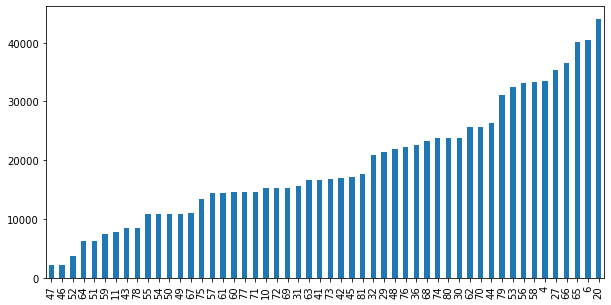

In [8]:
# Checking the distinct measurement sessions
plt.figure(figsize=(10,5))
df['profile_id'].value_counts().sort_values().plot(kind='bar')
plt.show()

### Of all the records in the dataset, most measurements are taken in the 20,65,6 measurment sessions.  

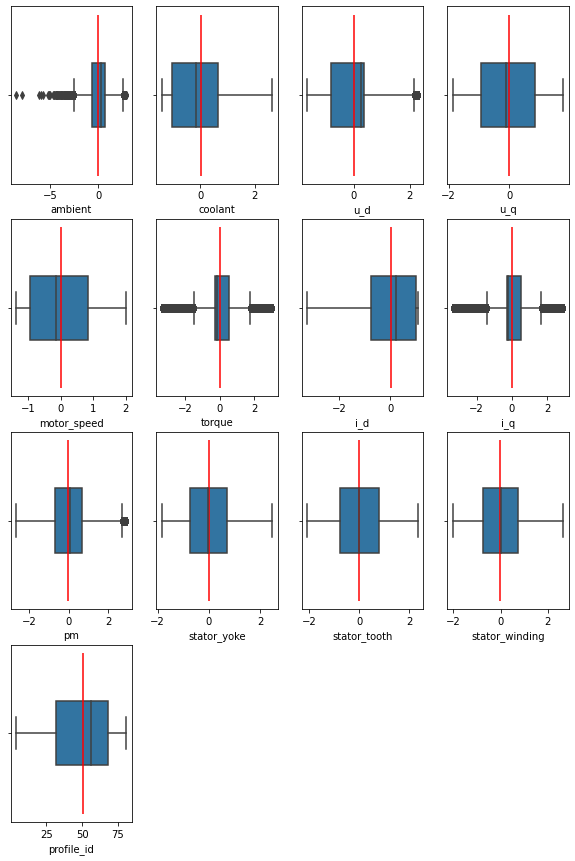

In [9]:
# Plotting the Boxplots of each column
plt.figure(figsize=(10,15))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sn.boxplot(df[df.columns[i]])
    plt.vlines(df[df.columns[i]].mean(),ymin = -1,ymax = 1,color = 'r')
plt.show()

### Observations

1. Ambient temperature seems to be having the outliers (on the extreme).
2. Remaining features doesn't seem to be having the outliers which may affect prediction.
3. Also mean and median of most of feature seems to coincide or are similar.

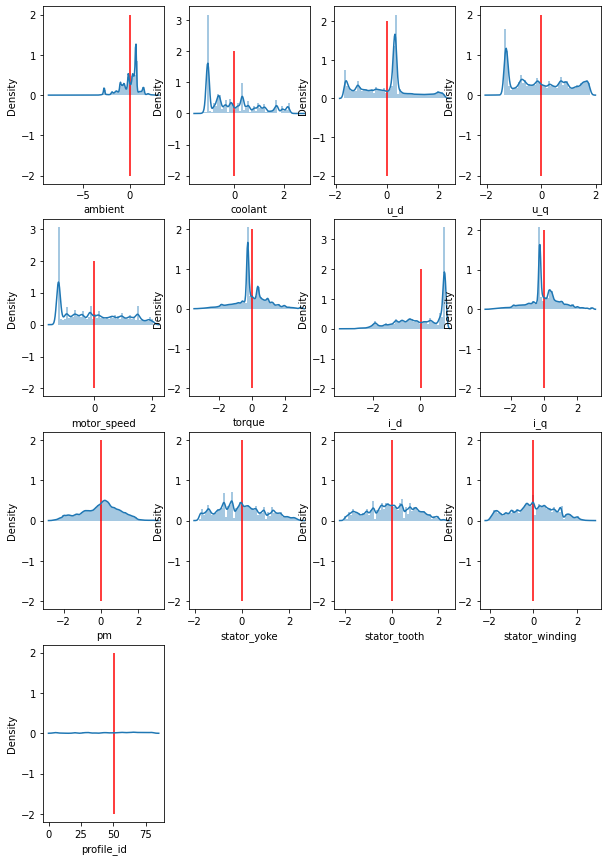

In [10]:
# Plotting the distributions of each column
plt.figure(figsize=(10,15))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sn.distplot(df[df.columns[i]])
    plt.vlines(df[df.columns[i]].mean(),ymin = -2,ymax = 2,color = 'r')
plt.show()

### Observations

1. some of the features seem to be of Normal distribution.
2. Ambient temperature and current d component seems a little left tailed.
3. coolant temperature, voltage q component and motor speed are right tailed


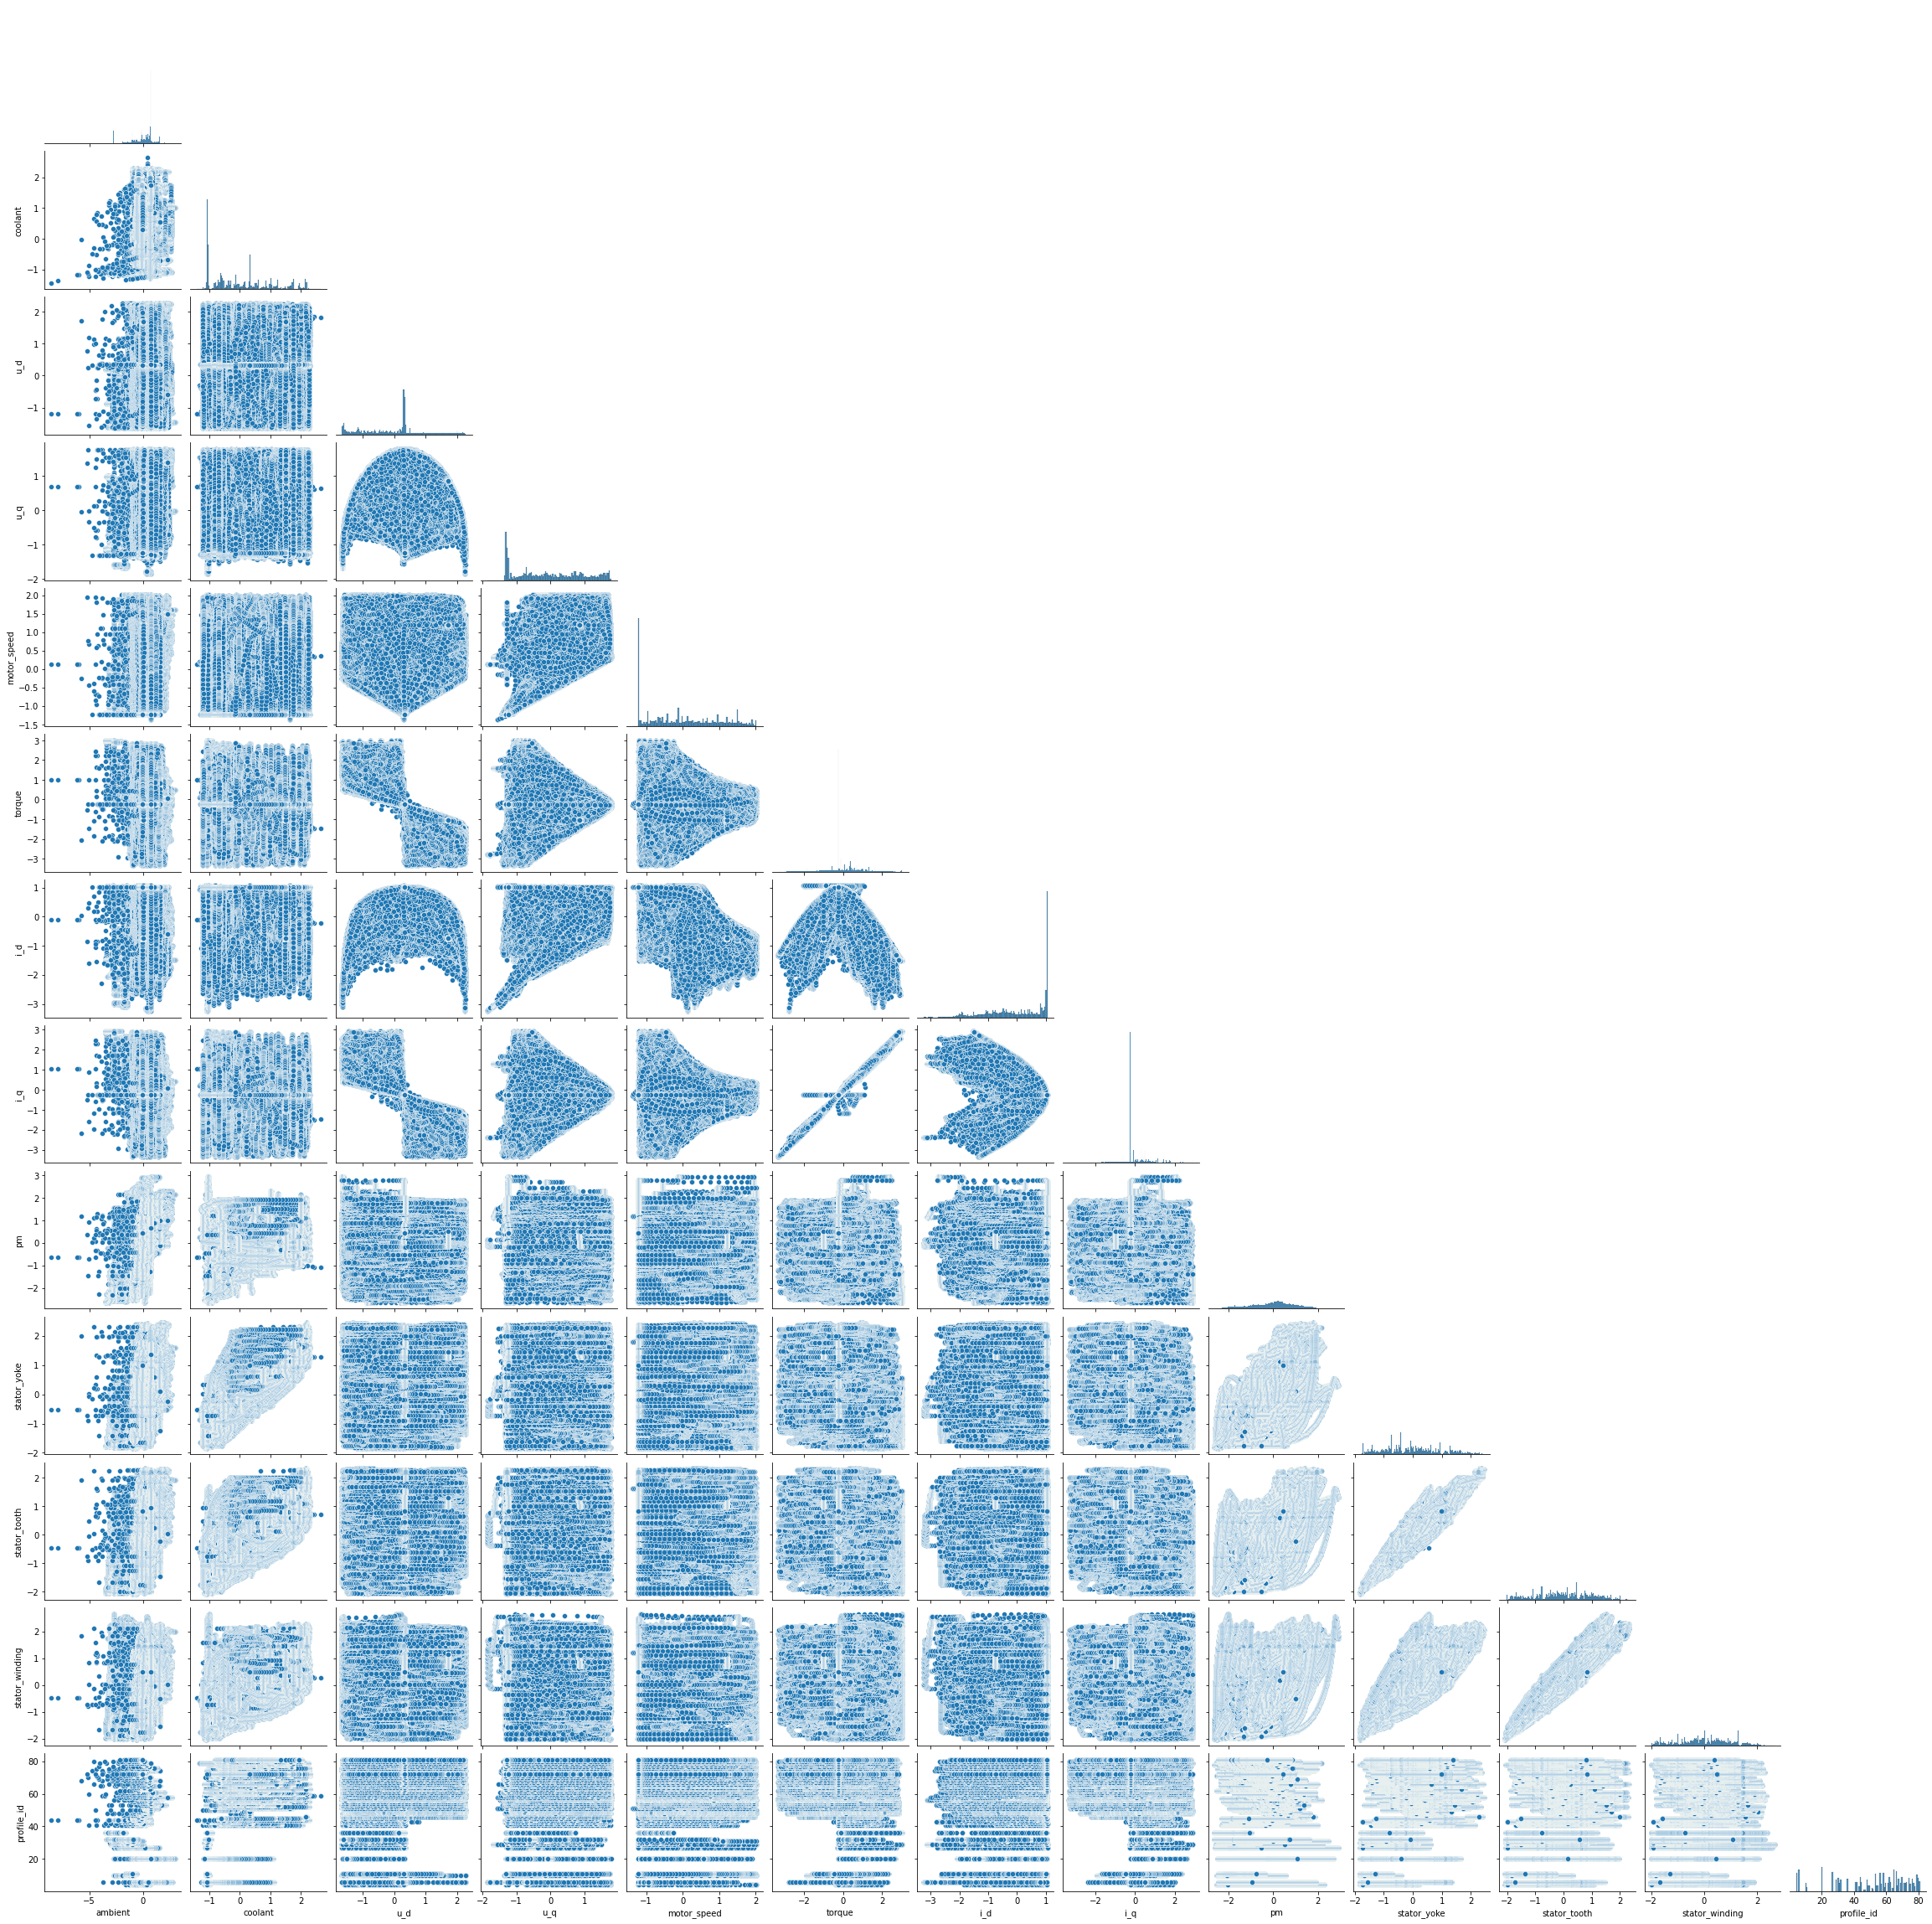

In [11]:
# Checking the correlation between features
sn.pairplot(df,corner=True)

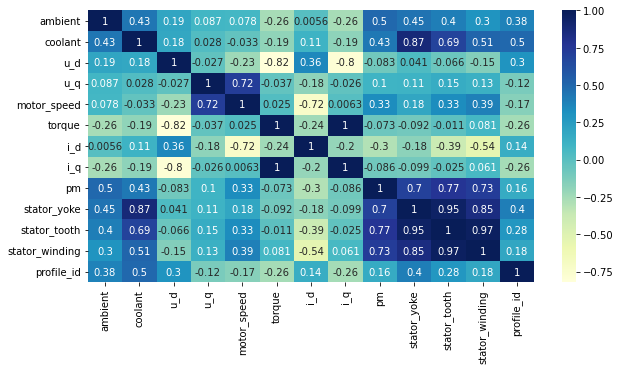

In [12]:
# PLottind the heat map to check correlation
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Observations on correlation

1. It seems that torque and current d component are perfectly correlated.
2. Also Stater yoke, Stater tooth and stater winding temperatures are dependent on each other.Ther are highly correlated.

In [13]:
len(df.profile_id.unique())

52

52 batches are there

<AxesSubplot:xlabel='profile_id', ylabel='motor_speed'>

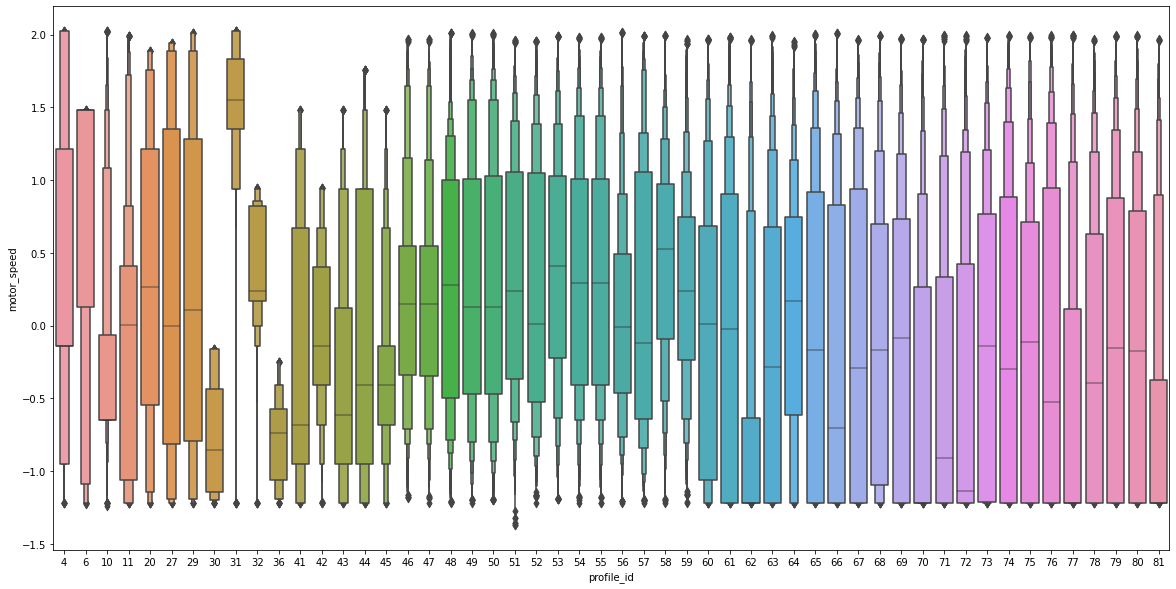

In [14]:
# Boxplot of motor speed for each batch
plt.figure(figsize=(20,10))
sn.boxenplot(df.profile_id,df.motor_speed)

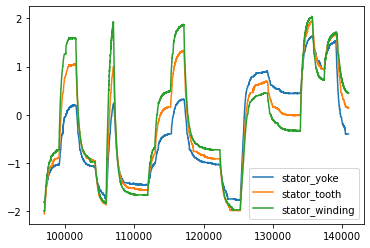

In [15]:
df[df['profile_id']==20]['stator_yoke'].plot(kind='line')
df[df['profile_id']==20]['stator_tooth'].plot(kind='line')
df[df['profile_id']==20]['stator_winding'].plot(kind='line')
plt.legend()

Trend for all thre are same

# Model Building

In [5]:
# Dropping profile id
df_1=df.drop(['profile_id'],axis=1)

In [6]:
# Splitting dependent and independent variable
X=df_1.drop(['motor_speed'],axis=1)
y=df_1['motor_speed']
y

0        -1.222428
1        -1.222429
2        -1.222428
3        -1.222430
4        -1.222429
            ...   
998065   -1.222428
998066   -1.222437
998067   -1.222430
998068   -1.222432
998069   -1.222431
Name: motor_speed, Length: 998070, dtype: float64

In [7]:
#Splitting Data into train and test Data
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

## Feature Selection

### LASSO Regularization

In [8]:
from sklearn.linear_model import LinearRegression,Lasso
# Fitting the model
lasso=Lasso(alpha=1)
lasso.fit(X_train,y_train)
y_prednet=lasso.predict(X_test)

#Calculating Mean Squared Error
mse=np.mean((y_prednet-y_test)**2)
print("Mean Sqaured Error is",mse)

#Printing Lasso Coefficients
lasso_results=pd.DataFrame()
lasso_results["Features"]=X.columns
lasso_results['Lasso coeff']=pd.Series(lasso.coef_)
print(lasso_results)

Mean Sqaured Error is 1.0017364053658206
          Features  Lasso coeff
0          ambient          0.0
1          coolant         -0.0
2              u_d         -0.0
3              u_q          0.0
4           torque          0.0
5              i_d         -0.0
6              i_q          0.0
7               pm          0.0
8      stator_yoke          0.0
9     stator_tooth          0.0
10  stator_winding          0.0


Coefficint of unwated features will be Zero in Lasso regularization.L1 REhularization also helps in feature Selection.

### ElasticNet

In [9]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_net=np.round(np.mean((y_prednet-y_test)**2),5)
rmse_net=np.round(np.mean((y_prednet-y_test)**0.5),5)
rmsle_net=np.round(np.log(rmse_net),5)
r2_net=np.round(r2_score(y_test,y_prednet),5)
ar_net=np.round(1 - ((1-r2_net)*(299421-1)/(299421-11-1)),5)
print(rms_net,rmse_net,rmsle_net,r2_net,ar_net)

1.00174 0.86235 -0.14809 -1e-05 -5e-05


In [ ]:
ElasticNet is combination of Both Lasso and Ridge Regularization Which balances between feature selection and feature preservation. 

By Observing the coefficients current d component and voltage q component seem important, Rest do not affect much.

In [10]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
model_net = ElasticNet(alpha = .3,l1_ratio=.5) 
model_net.fit(X_train, y_train) 
y_prednet = model_net.predict(X_test) 

# calculate the prediction and mean square error 
mean_squared_error = np.mean((y_prednet - y_test)**2) 
print("Mean Squared Error ", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(model_net.coef_) 
e_net_coeff 

Mean Squared Error  0.19875038682339025


Columns  Coefficient Estimate
0          ambient              0.000000
1          coolant             -0.000000
2              u_d             -0.000000
3              u_q              0.424594
4           torque             -0.000000
5              i_d             -0.429512
6              i_q             -0.000000
7               pm              0.009507
8      stator_yoke              0.000000
9     stator_tooth              0.000000
10  stator_winding              0.000000

In [11]:
model_net.score(X_test,y_test)

0.8015925764967936

ElasticNet is combination of Both Lasso and Ridge Regularization Which balances between feature selection and feature preservation. 

By Observing the coefficients current d component and voltage q component seem important, Rest do not affect much.

### Calculating VIF 

In [12]:
import statsmodels.formula.api as smf

#Building Model taking one featre as Independent at a time
rs_a=smf.ols('ambient~coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_a=1/(1-rs_a)

rs_c=smf.ols('coolant~ambient+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_c=1/(1-rs_c)

rs_ud=smf.ols('u_d~ambient+coolant+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_ud=1/(1-rs_ud)

rs_uq=smf.ols('u_q~ambient+coolant+u_d+torque+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_uq=1/(1-rs_uq)

rs_t=smf.ols('torque~ambient+coolant+u_d+u_q+i_d+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_t=1/(1-rs_t)

rs_id=smf.ols('i_d~ambient+coolant+u_d+u_q+torque+i_q+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_id=1/(1-rs_id)

rs_iq=smf.ols('i_q~ambient+coolant+u_d+u_q+torque+i_d+pm+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_iq=1/(1-rs_iq)

rs_pm=smf.ols('pm~ambient+coolant+u_d+u_q+torque+i_d+i_q+stator_yoke+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_pm=1/(1-rs_pm)

rs_sy=smf.ols('stator_yoke~ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_tooth+stator_winding',
             data=df_1).fit().rsquared
vif_sy=1/(1-rs_sy)

rs_st=smf.ols('stator_tooth~ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_winding',
             data=df_1).fit().rsquared
vif_st=1/(1-rs_st)

rs_sw=smf.ols('stator_winding~ambient+coolant+u_d+u_q+torque+i_d+i_q+pm+stator_yoke+stator_tooth',
             data=df_1).fit().rsquared
vif_sw=1/(1-rs_sw)


In [13]:
vif_values=pd.DataFrame()
vif_values['Features']=X.columns
vif_values['VIF']=[vif_a,vif_c,vif_ud,vif_uq,vif_t,vif_id,vif_iq,vif_pm,vif_sy,vif_st,vif_sw]
vif_values

Features         VIF
0          ambient    1.591301
1          coolant   39.200092
2              u_d    4.663596
3              u_q    1.494069
4           torque  260.458613
5              i_d    2.975567
6              i_q  230.363548
7               pm    4.233975
8      stator_yoke  369.137061
9     stator_tooth  642.335550
10  stator_winding  157.083745

More the VIF value More is the colinearity of that feature with orjet features which can interupt in the model building process.
Consider the  features having VIF<20.

Consider ambient , voltage d and q component , current d component and pm .

In [14]:
df_2=df_1[['ambient', 'u_d', 'u_q', 'i_d', 'pm']]
X_train=X_train[['ambient', 'u_d', 'u_q', 'i_d', 'pm']]
X_test=X_test[['ambient', 'u_d', 'u_q', 'i_d', 'pm']]
X_test

ambient       u_d       u_q       i_d        pm
569037  0.645918  1.707640  0.679409 -1.141527 -0.415926
12747  -0.607058  0.299006  0.958047  1.029143 -1.706074
186484 -1.327393 -0.264571  0.550308  0.850165 -1.038909
133839  0.688424  0.330433 -1.127545  1.029143 -0.329583
568333  0.590230  0.938762  1.577837  0.357305 -0.664053
...          ...       ...       ...       ...       ...
572241  0.864583  0.320400 -1.329830  1.029146  1.191597
340263 -0.196726 -0.400195  1.550053 -0.117739 -0.182351
146005 -0.998927 -1.605351 -0.691988 -2.007985  1.156150
859848 -0.103690  1.022254 -1.049615 -0.795226  1.589580
949729 -0.807778  0.325005 -1.327663  1.029145  0.503327

[299421 rows x 5 columns]

### Linear Regression Model

In [15]:
import statsmodels.formula.api as smf
Model1=smf.ols('motor_speed~ambient+u_d+u_q+i_d+pm',data=df_1).fit()
Model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.553e+06
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:08:18   Log-Likelihood:            -3.3333e+05
No. Observations:              998070   AIC:                         6.667e+05
Df Residuals:                  998064   BIC:                         6.667e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.000      2.856      0.004       0.000       0.002
ambient       -0.0288      0.000    -69.843      0.000      -0.030      -0.028
u_d            0.0062      0.000     16.539      0.000       0.005       0.007
u_q            0.6017      0.000   1745.823      0.000       0.601       0.602
i_d           -0.5831      0.000  -1508.538      0.000      -0.584      -0.582
pm             0.1128      0.000    267.895      0.000       0.112       0.114
==============================================================================
Omnibus:                    35198.463   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81100.564
Skew:                          -0.205   Prob(JB):                         0.00
Kurtosis:                       4.335   Cond. No.                         2.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# Model Building using Sklearn
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [17]:
# Model Evaluation
from sklearn.metrics import r2_score
y_pred1=model_1.predict(X_test)
rms_1=np.round(np.mean((y_pred1-y_test)**2),5)
rmse_1=np.round(np.mean((y_pred1-y_test)**0.5),5)
rmsle_1=np.round(np.log(rmse_1),5)
r2_1=np.round(r2_score(y_test,y_pred1),5)
ar_1=np.round(1 - ((1-r2_1)*(299421-1)/(299421-11-1)),5)
print(rms_1,rmse_1,rmsle_1,r2_1,ar_1)

0.11405 0.46665 -0.76218 0.88615 0.88615


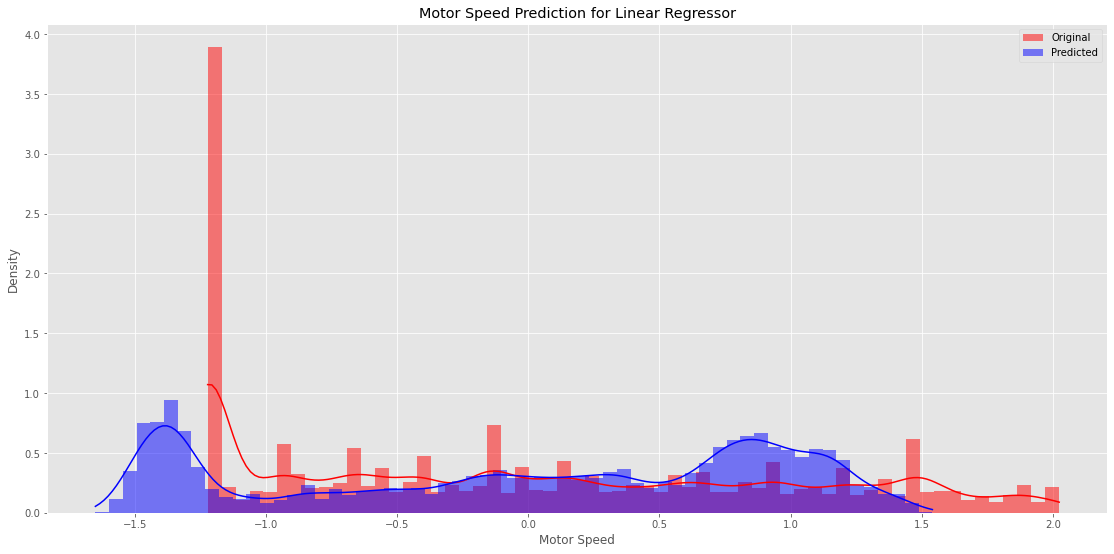

In [34]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred1, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction for Linear Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### Random Forest 

In [18]:
# Fitting model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
num_trees = 30
max_features = 3
model_2 = RandomForestRegressor(n_estimators=30, max_features=3)
model_2.fit(X_train,y_train)
y_pred2=model_2.predict(X_test)


In [19]:
# Model Evaluation
from sklearn.metrics import r2_score
rms_2=np.round(np.mean((y_pred2-y_test)**2),5)
rmse_2=np.round(np.mean((y_pred2-y_test)**0.5),5)
rmsle_2=np.round(np.log(rmse_2),5)
r2_2=np.round(r2_score(y_test,y_pred2),5)
ar_2=np.round(1 - ((1-r2_2)*(299421-1)/(299421-11-1)),5)
print(rms_2,rmse_2,rmsle_2,r2_2,ar_2)

0.00107 0.05128 -2.97045 0.99893 0.99893


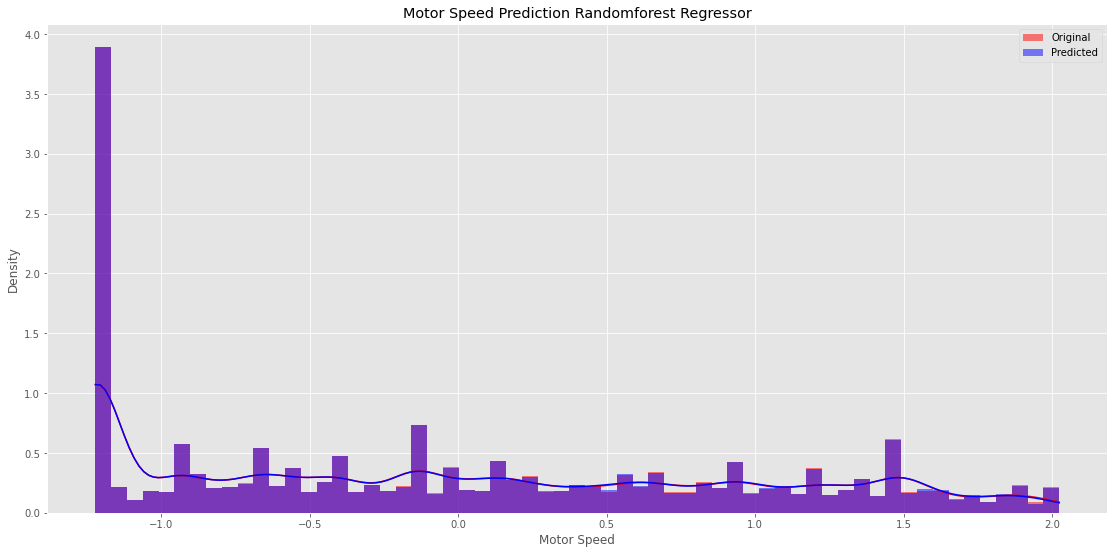

In [37]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred2, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Randomforest Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### XGBoost

In [38]:
# Fitting model
from xgboost import XGBRegressor
model_3 = XGBRegressor(n_estimators=30,max_depth=3)
model_3.fit(X_train,y_train)
y_pred3=model_3.predict(X_test)

In [39]:
model_3.score(X_test,y_test)

0.9847194096379733

In [40]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_3=np.round(np.mean((y_pred3-y_test)**2),5)
rmse_3=np.round(np.mean((y_pred3-y_test)**0.5),5)
rmsle_3=np.round(np.log(rmse_3),5)
r2_3=np.round(r2_score(y_test,y_pred3),5)
ar_3=np.round(1 - ((1-r2_3)*(299421-1)/(299421-11-1)),5)
print(rms_3,rmse_3,rmsle_3,r2_3,ar_3)

0.01531 0.21205 -1.55093 0.98472 0.98472


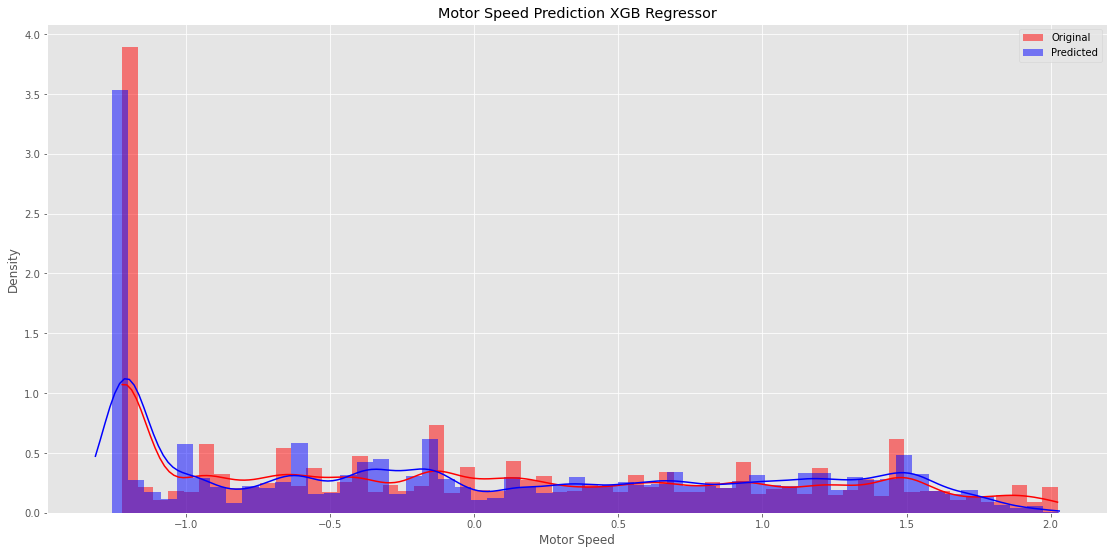

In [41]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred3, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction XGB Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()


### Ada Boost

In [42]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
model_4 = AdaBoostRegressor(n_estimators=30, base_estimator=dtree,learning_rate=1)
model_4.fit(X_train, y_train)
y_pred4=model_4.predict(X_test)

In [43]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_4=np.round(np.mean((y_pred4-y_test)**2),5)
rmse_4=np.round(np.mean((y_pred4-y_test)**0.5),5)
rmsle_4=np.round(np.log(rmse_4),5)
r2_4=np.round(r2_score(y_test,y_pred4),5)
ar_4=np.round(1 - ((1-r2_4)*(299421-1)/(299421-11-1)),5)
print(rms_4,rmse_4,rmsle_4,r2_4,ar_4)

0.00104 0.04899 -3.01614 0.99896 0.99896


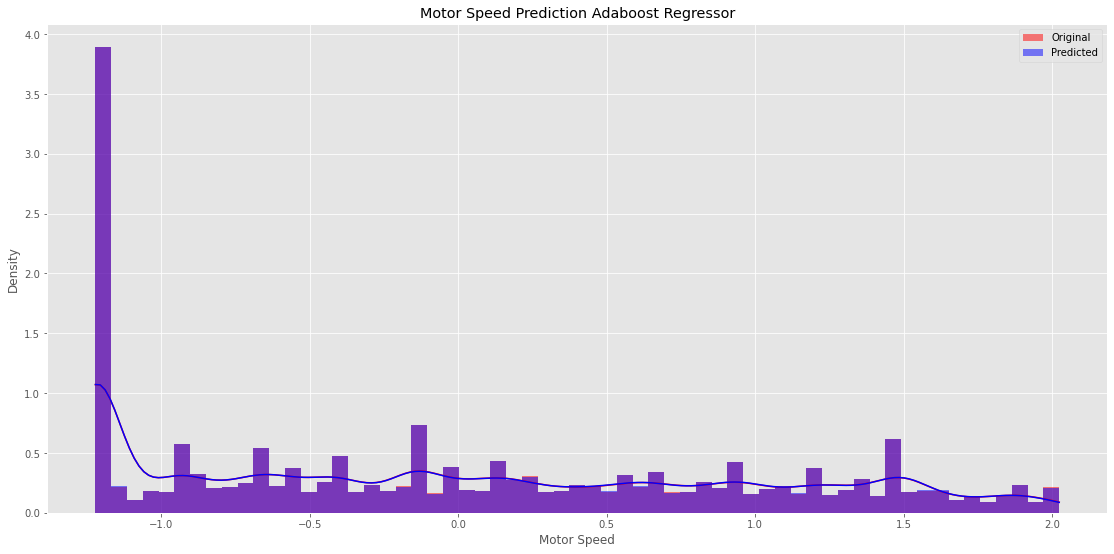

In [44]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred4, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Adaboost Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor
model_5=DecisionTreeRegressor()
model_5.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
y_pred5=model_5.predict(X_test)
model_5.score(X_test,y_test)


0.9976818198106269

In [47]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_5=np.round(np.mean((y_pred5-y_test)**2),5)
rmse_5=np.round(np.mean((y_pred5-y_test)**0.5),5)
rmsle_5=np.round(np.log(rmse_5),5)
r2_5=np.round(r2_score(y_test,y_pred5),5)
ar_5=np.round(1 - ((1-r2_5)*(299421-1)/(299421-11-1)),5)
print(rms_5,rmse_5,rmsle_5,r2_5,ar_5)

0.00232 0.06133 -2.79149 0.99768 0.99768


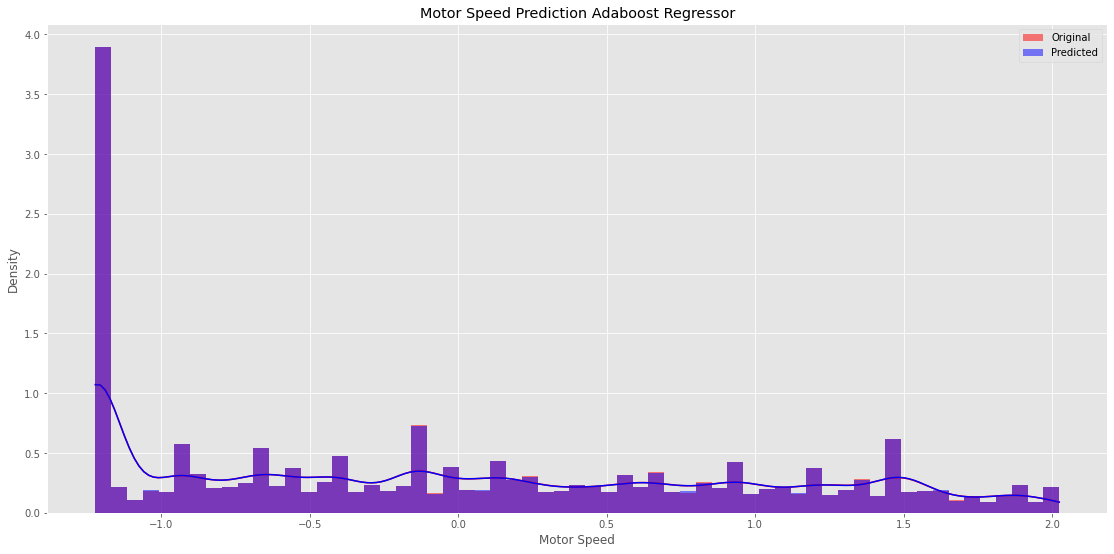

In [48]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred5, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Adaboost Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### KNN

In [49]:
from sklearn.neighbors import KNeighborsRegressor

model_6=KNeighborsRegressor(n_neighbors=3)
model_6.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
y_pred6=model_6.predict(X_test)
model_6.score(X_test,y_test)

0.9980335610024976

In [51]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_6=np.round(np.mean((y_pred6-y_test)**2),5)
rmse_6=np.round(np.mean((y_pred6-y_test)**0.5),5)
rmsle_6=np.round(np.log(rmse_6),5)
r2_6=np.round(r2_score(y_test,y_pred6),5)
ar_6=np.round(1 - ((1-r2_6)*(299421-1)/(299421-11-1)),5)
print(rms_6,rmse_6,rmsle_6,r2_6,ar_6)

0.00197 0.06558 -2.72448 0.99803 0.99803


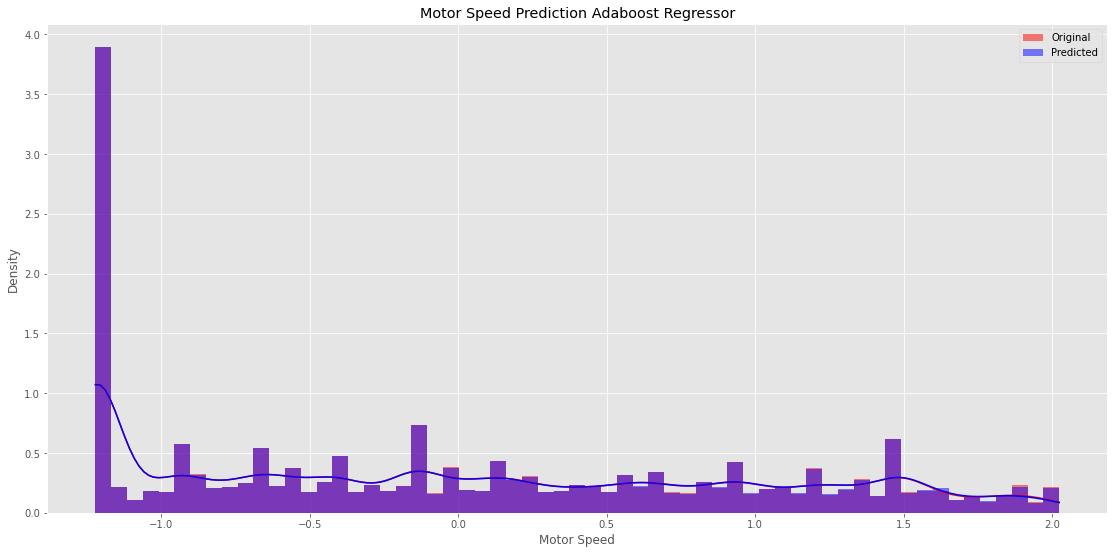

In [52]:
 plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred6, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Adaboost Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### Bragging

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
cart=DecisionTreeRegressor()
model_7 = BaggingRegressor(base_estimator=cart, n_estimators=30)
model_7.fit(X_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=30)

In [54]:
y_pred7=model_7.predict(X_test)
model_7.score(X_test,y_test)

0.9988233822756495

In [55]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_7=np.round(np.mean((y_pred7-y_test)**2),5)
rmse_7=np.round(np.mean((y_pred7-y_test)**0.5),5)
rmsle_7=np.round(np.log(rmse_7),5)
r2_7=np.round(r2_score(y_test,y_pred7),5)
ar_7=np.round(1 - ((1-r2_7)*(299421-1)/(299421-11-1)),5)
print(rms_7,rmse_7,rmsle_7,r2_7,ar_7)

0.00118 0.05213 -2.95401 0.99882 0.99882


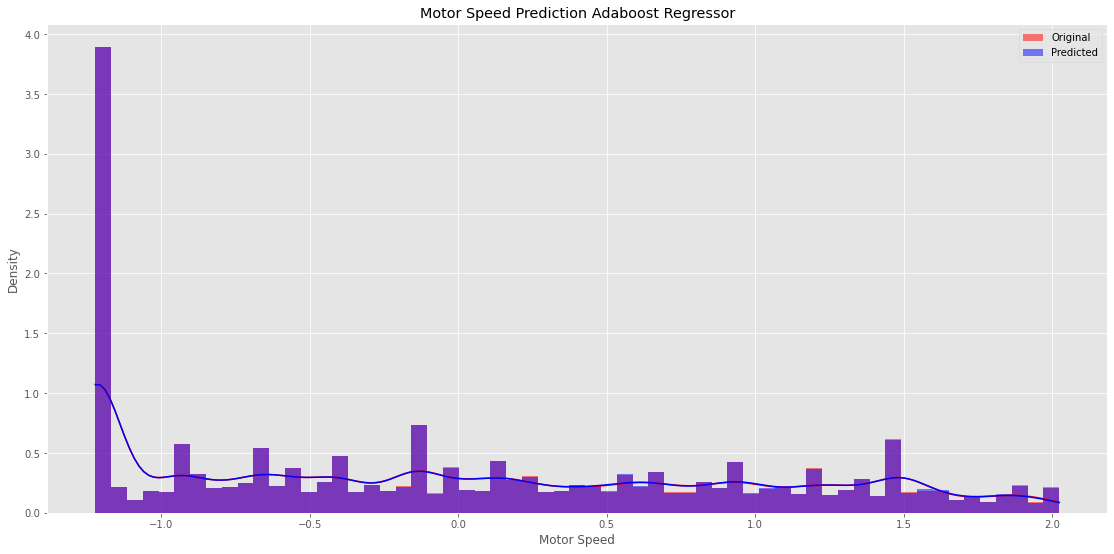

In [56]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred7, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Adaboost Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

### Gradient Boosting

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
model_8 = GradientBoostingRegressor()
model_8.fit(X_train, y_train)

GradientBoostingRegressor()

In [58]:
y_pred8=model_8.predict(X_test)
model_8.score(X_test,y_test)

0.9871060246844792

In [59]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_8=np.round(np.mean((y_pred8-y_test)**2),5)
rmse_8=np.round(np.mean((y_pred8-y_test)**0.5),5)
rmsle_8=np.round(np.log(rmse_8),5)
r2_8=np.round(r2_score(y_test,y_pred8),5)
ar_8=np.round(1 - ((1-r2_8)*(299421-1)/(299421-11-1)),5)
print(rms_8,rmse_8,rmsle_8,r2_8,ar_8)

0.01292 0.19865 -1.61621 0.98711 0.98711


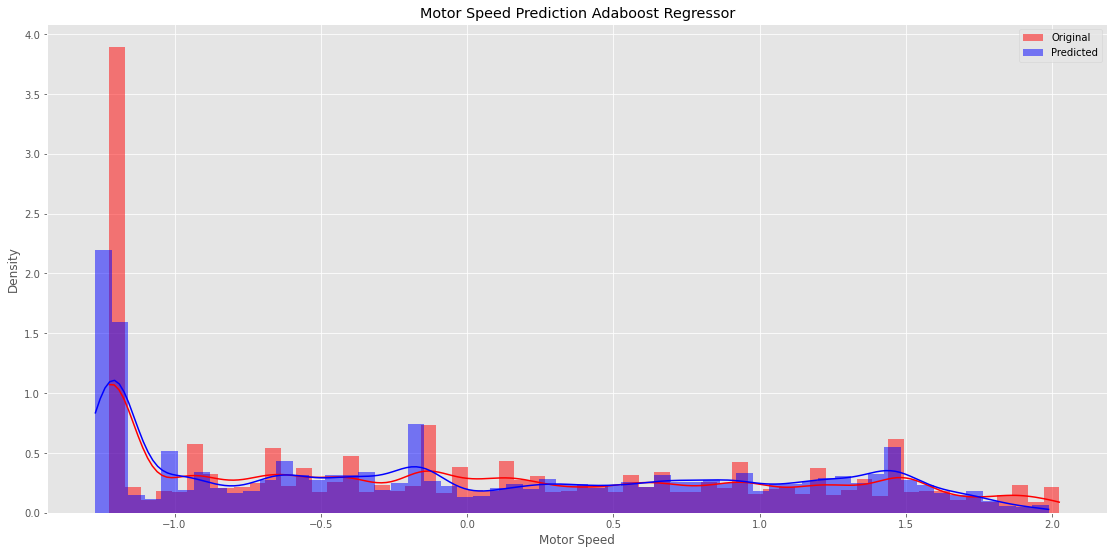

In [60]:
plt.style.use('ggplot') 
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred8, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right') 
plt.title("Motor Speed Prediction Adaboost Regressor") 
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [80]:
Model_Evaluations=pd.DataFrame({'Models':['Linear Regression','Random Forest','XGBoost','AdaBoost','Elast net','Decision Tress','KNN','Bragging','Gradient Boosting'], 
                                'Accuracy':[r2_1*100,r2_2*100,r2_3*100,r2_4*100,r2_net*100,r2_5*100,r2_6*100,r2_7*100,r2_8*100],
                                'R Squared':[r2_1,r2_2,r2_3,r2_4,r2_net,r2_5,r2_6,r2_7,r2_8],
                                'Adjusted R Square':[ar_1,ar_2,ar_3,ar_4,ar_net,ar_5,ar_6,ar_7,ar_8],
                                'Mean square error':[rms_1,rms_2,rms_3,rms_4,rms_net,rms_5,rms_6,rms_7,rms_8],
                                'Root Mean square error':[rmse_1,rmse_2,rmse_3,rmse_4,rmse_net,rmse_5,rmse_6,rmse_7,rmse_8],
                                'Root Mean squared log error':[rmsle_1,rmsle_2,rmsle_3,rmsle_4,rmsle_net,rmsle_5,rmsle_6,rmsle_7,rmsle_8]})
Model_Evaluations

Models  Accuracy  R Squared  Adjusted R Square  \
0  Linear Regression    88.615    0.88615            0.88615   
1      Random Forest    99.894    0.99894            0.99894   
2            XGBoost    98.472    0.98472            0.98472   
3           AdaBoost    99.896    0.99896            0.99896   
4          Elast net    80.159    0.80159            0.80158   
5     Decision Tress    99.768    0.99768            0.99768   
6                KNN    99.803    0.99803            0.99803   
7           Bragging    99.882    0.99882            0.99882   
8  Gradient Boosting    98.711    0.98711            0.98711   

   Mean square error  Root Mean square error  Root Mean squared log error  
0            0.11405                 0.46665                     -0.76218  
1            0.00106                 0.05135                     -2.96909  
2            0.01531                 0.21205                     -1.55093  
3            0.00104                 0.04899                     -3.01614  
4            0.19875                 0.48759                     -0.71828  
5            0.00232                 0.06133                     -2.79149  
6            0.00197                 0.06558                     -2.72448  
7            0.00118                 0.05213                     -2.95401  
8            0.01292                 0.19865                     -1.61621

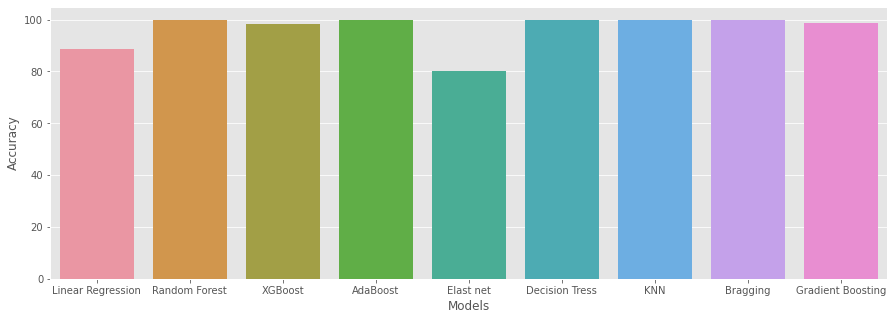

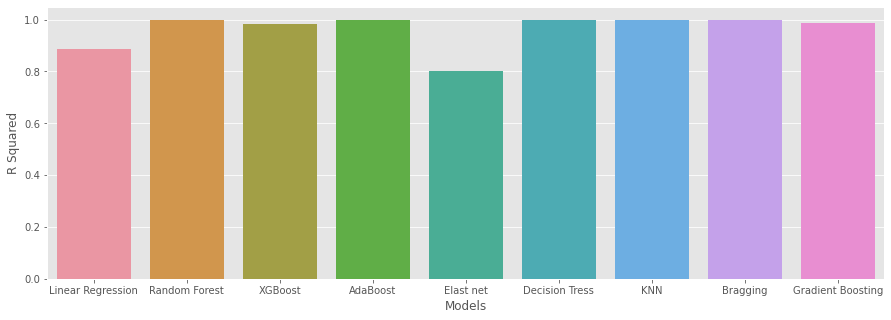

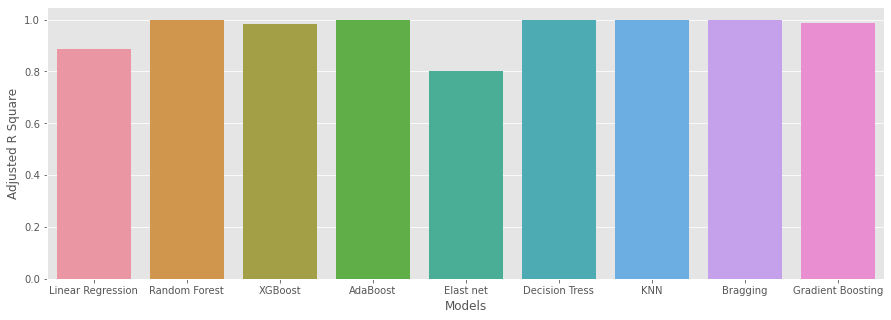

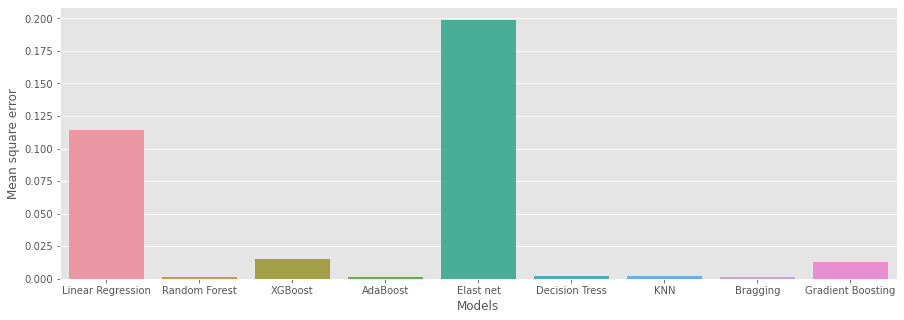

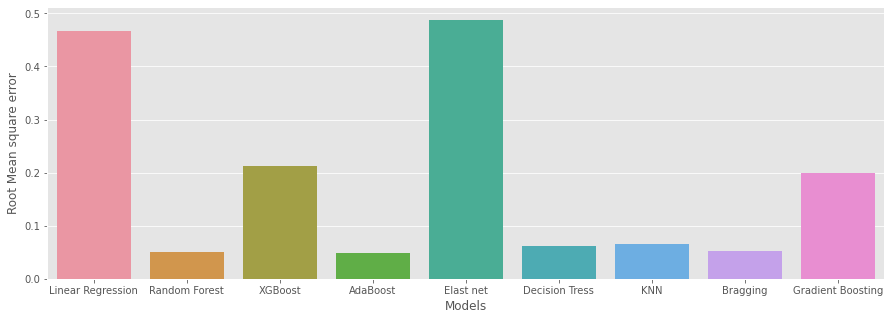

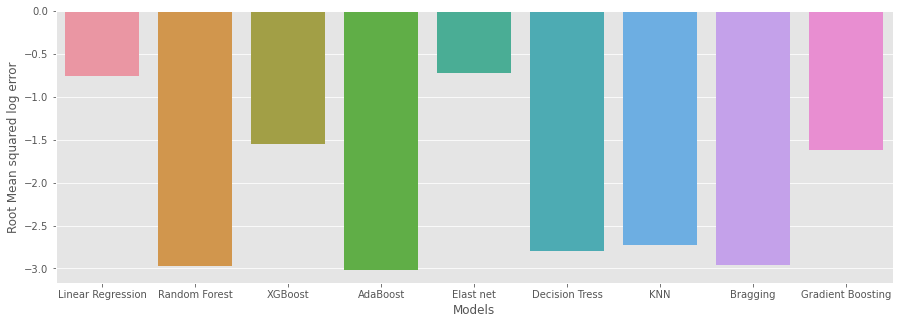

In [81]:
# Best Models with respect to different Evaluations
for i in Model_Evaluations.iloc[:,1:]:
    plt.style.use('ggplot') 
    plt.figure(figsize=(15,5
                       ))
    sn.barplot(x='Models',y=i,data=Model_Evaluations)
    
plt.show()

# Deployment Of the Model

In [20]:
import pickle

In [21]:
#Saving the Trained model
filename= 'Trained_model.sav'
pickle.dump(model_2,open(filename,'wb'))

In [22]:
#Loading the saved model
loaded_model=pickle.load(open('Trained_model.sav','rb'))

In [23]:
# Predicting the value using loaded model
#test=X_test.head(1)
test=(-0.807778,0.325005,-1.327663,1.029145,0.503327)
a_test=np.asarray(test)
r_a_test=a_test.reshape(1,-1)
test_see=loaded_model.predict(r_a_test)
print (test_see)

[-1.22242966]


In [24]:
y_test.tail(1)

949729   -1.222431
Name: motor_speed, dtype: float64

In [25]:
X_test.tail(1)

ambient       u_d       u_q       i_d        pm
949729 -0.807778  0.325005 -1.327663  1.029145  0.503327

## The values are pretty same to original

In [ ]:
!streamlit run Speed_prediction_web.py